In [2]:
import utils
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

In [10]:
output_file = r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\hitlists\\hitlist'
querys = r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\querys\\sEH-1ZD5_mod5_LS_3.02_infer_best.pml'
actives_db = r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\ldb2s\\actives.ldb2:active'
inactives_db = r"C:\\Users\\kilia\\MASTER\\rlpharm\\data\\ldb2s\\inactives.ldb2:inactive"
hits, scores, pos, neg = utils.exec_vhts(output_file, querys, actives_db, inactives_db)

In [11]:
print(f"{sum(hits)} {hits.count(0)}")

26 15


In [12]:
hitlist = hits
roc_auc_score(hits, scores)

0.47948717948717945

In [13]:
idx = np.where(np.array(hits) == 0)[0]
print(idx)
j=0
for i in idx:
    hits = np.insert(hits, i+j, np.zeros(9))
    scores = np.insert(scores, i+j, np.full(9,scores[i+j])) 
    j += 9

[26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [14]:
scores

array([43.58379 , 43.728706, 42.53597 , 44.010002, 43.86148 , 43.903664,
       44.723698, 43.898426, 43.955795, 45.039986, 43.423283, 43.979744,
       44.533108, 43.85082 , 43.89495 , 43.775597, 43.469658, 43.903404,
       43.84559 , 45.76776 , 43.429325, 43.338993, 44.842693, 43.36879 ,
       44.28854 , 43.831135, 43.618877, 43.618877, 43.618877, 43.618877,
       43.618877, 43.618877, 43.618877, 43.618877, 43.618877, 43.618877,
       43.91335 , 43.91335 , 43.91335 , 43.91335 , 43.91335 , 43.91335 ,
       43.91335 , 43.91335 , 43.91335 , 43.91335 , 43.757843, 43.757843,
       43.757843, 43.757843, 43.757843, 43.757843, 43.757843, 43.757843,
       43.757843, 43.757843, 44.649597, 44.649597, 44.649597, 44.649597,
       44.649597, 44.649597, 44.649597, 44.649597, 44.649597, 44.649597,
       43.32969 , 43.32969 , 43.32969 , 43.32969 , 43.32969 , 43.32969 ,
       43.32969 , 43.32969 , 43.32969 , 43.32969 , 44.170124, 44.170124,
       44.170124, 44.170124, 44.170124, 44.170124, 

In [15]:
hits

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
roc_auc_score(hits, scores)

0.47948717948717945

In [44]:
hits = [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
scores =[0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49]

In [36]:
import math
def insert_elements(i, j):
    i = np.ones(i)
    j = np.zeros(j)   
    n = len(i)  # Length of the array to be inserted
    m = len(j)  # Length of the target array
    if n == 0:  # If the array to be inserted is empty, return the target array as it is
        return j
    interval = math.ceil(m / n)  # interval to distribute the indices evenly
    index = 0
    for element in i:
        j.insert(index, element)  # Insert the element
        index += interval + 1 
    return j.tolist, np.full(len(j), 0).tolist()

def scoring(hits:list, scores:list, ldbi:int, ldba:int):
        """
        Calculate score
        :param hits: list of hit labels (0=FP or 1:TP)
        :param scores: list of pharmacophore fit scores
        :param ldbi: number of inactive compounds in the database
        :param ldba: number of active compounds in the database
        :return: rocAUC of the hitlist
        """     
        a_hits, a_scores = insert_elements(ldba-sum(hits), ldbi-(len(hits)-sum(hits)))
        sorted_hits = sorted(zip(scores.extend(a_scores), hits.extend(a_hits)), key=lambda x: x[0], reverse=True)
        sorted_true_labels = [label for _, label in sorted_hits]

        # Calculate the true positive count and false positive count
        num_positives = sum(sorted_true_labels)
        num_negatives = len(sorted_true_labels) - num_positives

        # Create arrays to store true positive rates and false positive rates
        tpr = np.zeros(len(sorted_true_labels))
        fpr = np.zeros(len(sorted_true_labels))

        # Iterate through the sorted hits to compute TPR and FPR
        tp_count = 0
        fp_count = 0
        for i, (_, label) in enumerate(sorted_hits):
            if label == 1:
                tp_count += 1
            if label == 0:
                fp_count += 1

            tpr[i] = tp_count / num_positives
            fpr[i] = fp_count / num_negatives  

        # Calculate the ROC AUC using the trapezoidal rule
        roc_auc = np.trapz(tpr, fpr)
        return roc_auc

In [56]:
scoring(hits, scores)

0.875

In [7]:
def weighted_roc_auc(y_true, y_pred_prob, fp_weight):
            fp_weighted_labels = [fp_weight if y_true == 0 else 1 for _ in y_true]  # Weight false positives
            roc_auc = roc_auc_score(y_true, y_pred_prob, sample_weight=fp_weighted_labels)
            return roc_auc
            
def scoring(hits, scores):
    """
    Calculate score
    :param hits: list of hit labels (0=FP or 1:TP)
    :param scores: list of pharmacophore fit scores
    :return: rocAUC of the hitlist
    """     
    # Calculate ROC AUC with weighted cost for false positives
    # Set the weight for false positives
    weight = 10
    return weighted_roc_auc(hits, scores, weight), roc_auc_score(hits, scores)

In [43]:
roc_auc_score(hits, scores)

0.3333333333333333

In [11]:
roc_curve(hits, scores)

(array([0.        , 0.09090909, 0.09090909, 0.18181818, 0.18181818,
        0.36363636, 0.36363636, 0.45454545, 0.45454545, 0.54545455,
        0.54545455, 0.63636364, 0.63636364, 0.72727273, 0.72727273,
        0.81818182, 0.81818182, 1.        , 1.        ]),
 array([0.        , 0.        , 0.11538462, 0.11538462, 0.26923077,
        0.26923077, 0.38461538, 0.38461538, 0.53846154, 0.53846154,
        0.73076923, 0.73076923, 0.76923077, 0.76923077, 0.80769231,
        0.80769231, 0.96153846, 0.96153846, 1.        ]),
 array([47.004494, 46.004494, 45.76776 , 45.677948, 44.769142, 44.704212,
        44.422855, 44.30406 , 44.04951 , 43.99253 , 43.881893, 43.868633,
        43.852295, 43.825985, 43.819466, 43.757633, 43.40404 , 43.199867,
        43.101425]))

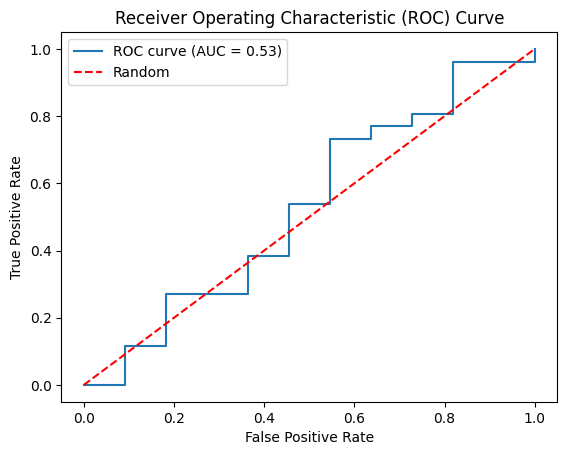

In [50]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(hits, scores)
auc = roc_auc_score(hits, scores)
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
